In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Load dataset
df = pd.read_csv('dataset/stack_overflow_2025_cleaned_eda.csv')
df.head()


,ResponseId,Age,Country,EdLevel,Employment,WorkExp,YearsCode,OrgSize,Industry,MainBranch,DevType,ICorPM,RemoteWork,LearnCode,LearnCodeChoose,LearnCodeAI,AIThreat,AISelect,AISent,AIOpen,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,DevEnvsHaveWorkedWith,ConvertedCompYearly,JobSat
0,1,25-34 years old,Ukraine,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,8.0,14.0,20 to 99 employees,Fintech,I am a developer by profession,"Developer, mobile",People manager,Remote,Online Courses or Certification (includes all ...,"Yes, I am not new to coding but am learning ne...","Yes, I learned how to use AI-enabled tools for...",I'm not sure,"Yes, I use AI tools monthly or infrequently",Indifferent,"Troubleshooting, profiling, debugging",Bash/Shell (all shells);Dart;SQL,Dart,Cloud Firestore;PostgreSQL,Amazon Web Services (AWS);Cloudflare;Firebase;...,Unknown,Android Studio;Notepad++;Visual Studio;Visual ...,61256.0,10.0
1,2,25-34 years old,Netherlands,"Associate degree (A.A., A.S., etc.)",Employed,2.0,10.0,500 to 999 employees,Retail and Consumer Services,I am a developer by profession,"Developer, back-end",Individual contributor,"Hybrid (some in-person, leans heavy to flexibi...",Online Courses or Certification (includes all ...,"Yes, I am not new to coding but am learning ne...","Yes, I learned how to use AI-enabled tools for...",I'm not sure,"Yes, I use AI tools weekly",Indifferent,All skills. AI is a flop.,Java,Java;Python;Swift,Dynamodb;MongoDB,Amazon Web Services (AWS);Datadog;Docker;Homeb...,Spring Boot,IntelliJ IDEA;PyCharm;Visual Studio Code;Xcode,104413.0,9.0
2,3,35-44 years old,Ukraine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",10.0,12.0,Unknown,Software Development,I am a developer by profession,"Developer, front-end",Unknown,Unknown,Online Courses or Certification (includes all ...,"Yes, I am not new to coding but am learning ne...","Yes, I learned how to use AI-enabled tools for...",No,"Yes, I use AI tools daily",Favorable,"Understand how things actually work, problem s...",Dart;HTML/CSS;JavaScript;TypeScript,Dart;HTML/CSS;JavaScript;TypeScript,MongoDB;MySQL;PostgreSQL,Datadog;Firebase;npm;pnpm,Next.js;Node.js;React,Visual Studio Code,53061.0,8.0
3,4,35-44 years old,Ukraine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,4.0,5.0,"10,000 or more employees",Retail and Consumer Services,I am a developer by profession,"Developer, back-end",Individual contributor,Remote,"Other online resources (e.g. standard search, ...","Yes, I am not new to coding but am learning ne...","Yes, I learned how to use AI-enabled tools for...",No,"Yes, I use AI tools weekly",Favorable,Unknown,Java;Kotlin;SQL,Java;Kotlin,Unknown,Amazon Web Services (AWS);Google Cloud,Spring Boot,Unknown,36197.0,6.0
4,5,35-44 years old,Ukraine,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",21.0,22.0,Unknown,Software Development,I am a developer by profession,Engineering manager,Unknown,Unknown,Unknown,"No, I am not new to coding and did not learn n...","Yes, I learned how to use AI-enabled tools for...",No,"Yes, I use AI tools weekly",Favorable,"critical thinking, the skill to define the tas...",C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...,C#;Java;JavaScript;Python;SQL;TypeScript,Elasticsearch;Microsoft SQL Server;MySQL;Oracl...,Amazon Web Services (AWS);APT;Docker;Make;Mave...,Angular;ASP.NET;ASP.NET Core;Flask;jQuery,Eclipse;IntelliJ IDEA;Jupyter Notebook/Jupyter...,60000.0,7.0


# Exploratory Data Analysis (EDA)

### Basic info & missing values

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              49123 non-null  int64  
 1   Age                     49123 non-null  object 
 2   Country                 49123 non-null  object 
 3   EdLevel                 49123 non-null  object 
 4   Employment              49123 non-null  object 
 5   WorkExp                 49123 non-null  float64
 6   YearsCode               49123 non-null  float64
 7   OrgSize                 49123 non-null  object 
 8   Industry                49123 non-null  object 
 9   MainBranch              49123 non-null  object 
 10  DevType                 49123 non-null  object 
 11  ICorPM                  49123 non-null  object 
 12  RemoteWork              49123 non-null  object 
 13  LearnCode               49123 non-null  object 
 14  LearnCodeChoose         49123 non-null

In [3]:
df.isnull().sum() # only 'ConvertedCompYearly' has missing values for now which is intentional.

ResponseId                    0
Age                           0
Country                       0
EdLevel                       0
Employment                    0
WorkExp                       0
YearsCode                     0
OrgSize                       0
Industry                      0
MainBranch                    0
DevType                       0
ICorPM                        0
RemoteWork                    0
LearnCode                     0
LearnCodeChoose               0
LearnCodeAI                   0
AIThreat                      0
AISelect                      0
AISent                        0
AIOpen                        0
LanguageHaveWorkedWith        0
LanguageWantToWorkWith        0
DatabaseHaveWorkedWith        0
PlatformHaveWorkedWith        0
WebframeHaveWorkedWith        0
DevEnvsHaveWorkedWith         0
ConvertedCompYearly       25195
JobSat                        0
dtype: int64

### Numeric summary

In [4]:
# Summary statistics for numeric columns
df[['WorkExp', 'YearsCode', 'ConvertedCompYearly', 'JobSat']].describe()

,WorkExp,YearsCode,ConvertedCompYearly,JobSat
count,49123.000000,49123.000000,2.392800e+04,49123.000000
mean,12.939947,16.254260,1.017916e+05,7.567209
std,10.150537,11.062818,4.619345e+05,1.523648
min,1.000000,1.000000,1.000000e+00,0.000000
25%,6.000000,8.000000,3.817100e+04,7.000000
50%,10.000000,14.000000,7.538350e+04,8.000000
75%,18.000000,21.000000,1.206302e+05,8.000000
max,100.000000,100.000000,5.000000e+07,10.000000


## 1. Demographics analysis

### Age distribution

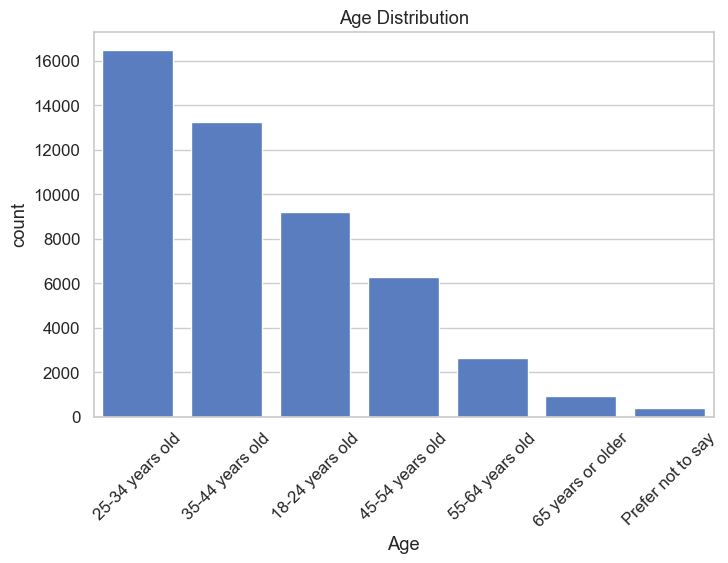

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Age', order=df['Age'].value_counts().index)
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()


### Country Distribution

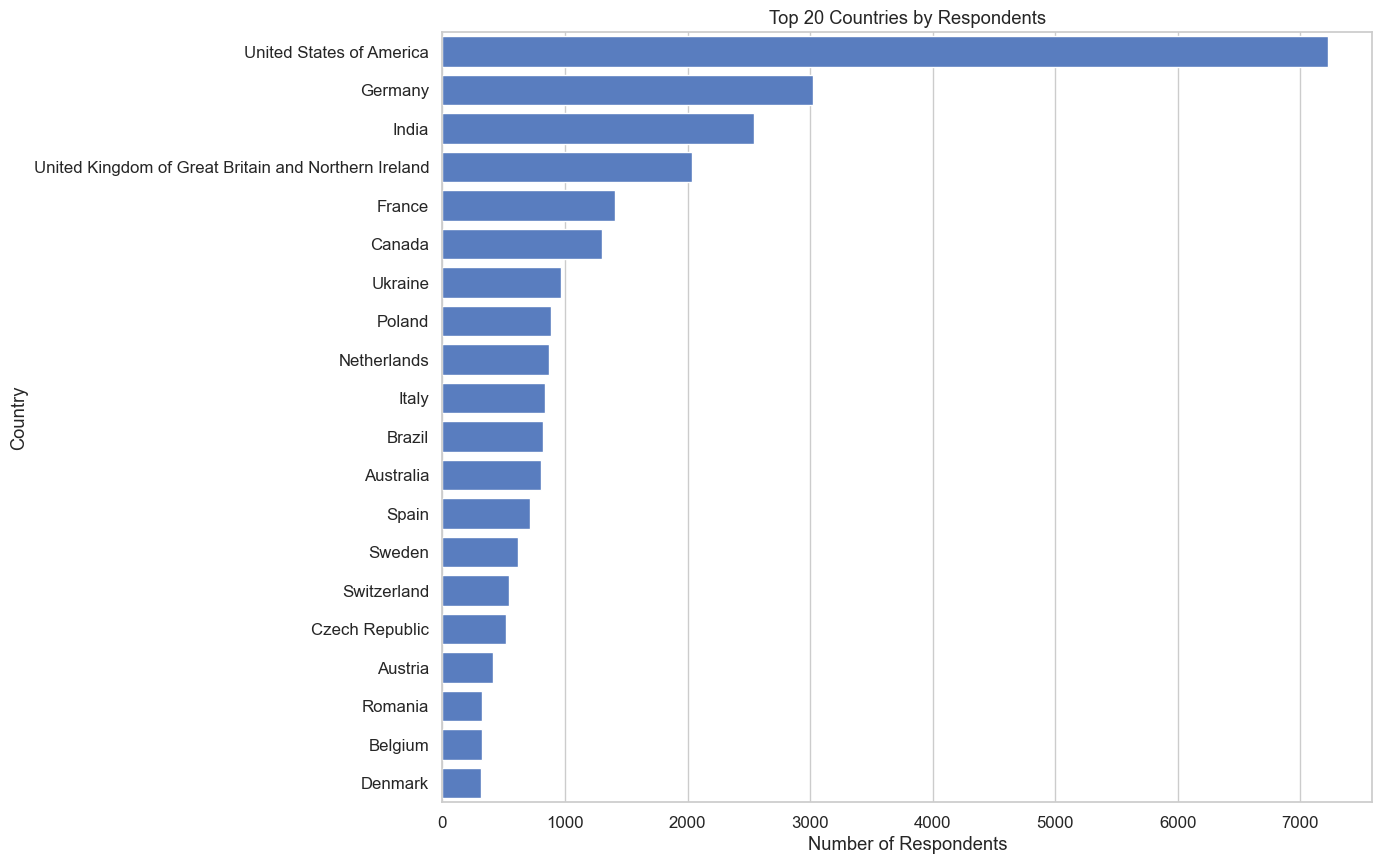

In [6]:
# Filter out 'Unknown'
country_counts = df[df['Country'] != 'Unknown']['Country'].value_counts().head(20)

# Plot
plt.figure(figsize=(12,10))
sns.barplot(x=country_counts.values, y=country_counts.index)  # swap x and y for better fit
plt.title('Top 20 Countries by Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.show()



### Education Level

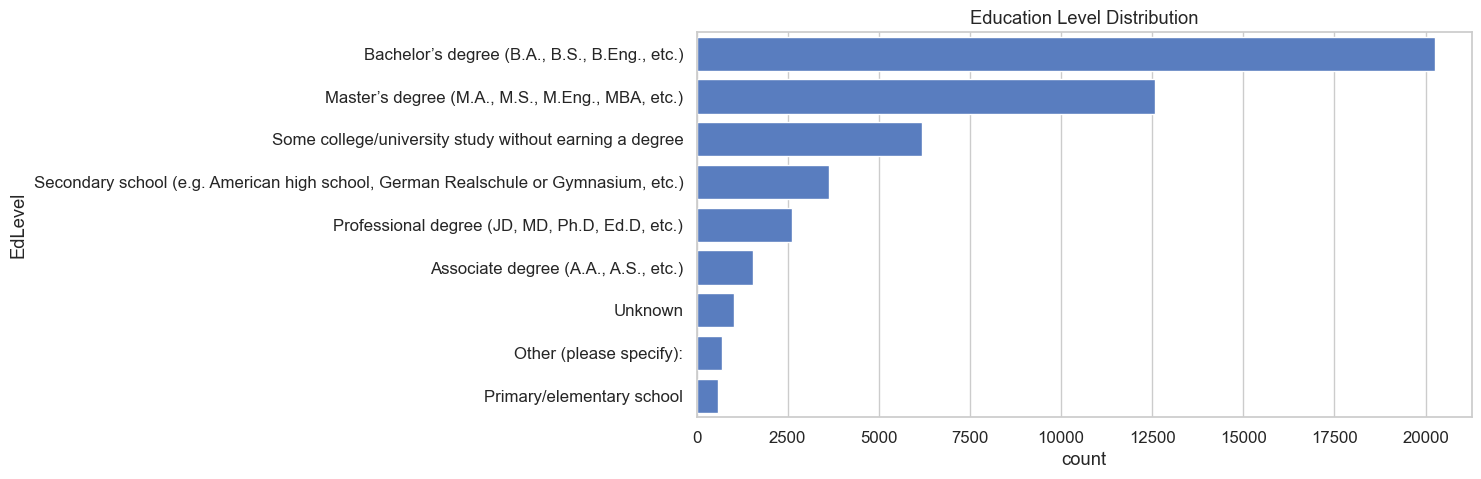

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='EdLevel', order=df['EdLevel'].value_counts().index)
plt.title('Education Level Distribution')
plt.show()


## 2. Employment & Career

### Employment Status

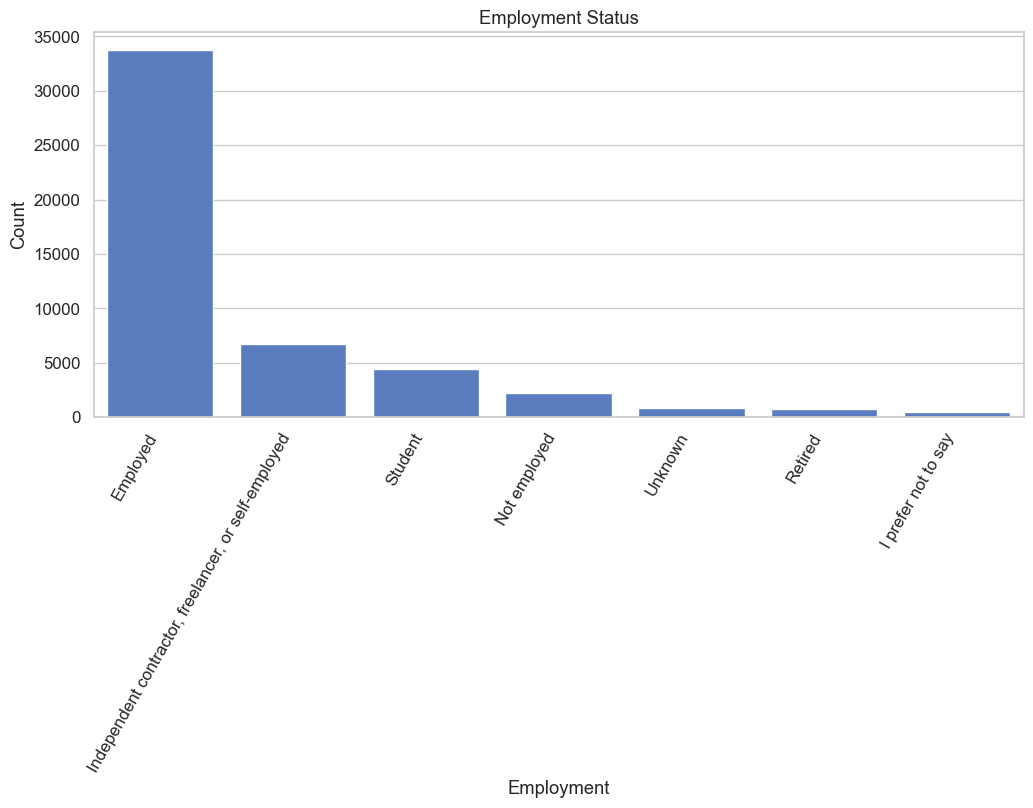

In [8]:
plt.figure(figsize=(12,5))  # wider figure
sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index)
plt.title('Employment Status')
plt.xticks(rotation=60, ha='right')  # rotate labels and align right
plt.xlabel('Employment')
plt.ylabel('Count')
plt.show()


### Developer Type

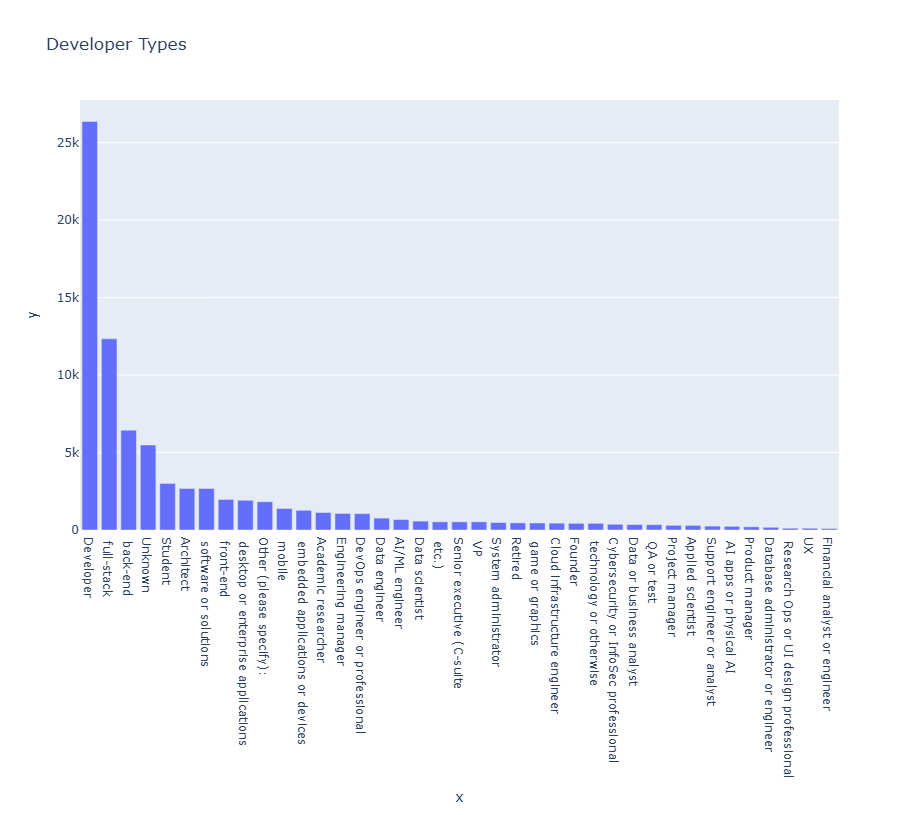

In [15]:
# Developer Type
dev_types = df['DevType'].str.get_dummies(sep=',').sum().sort_values(ascending=False)
import plotly.express as px

fig = px.bar(
    x=dev_types.index, 
    y=dev_types.values, 
    title='Developer Types',
    width=1200,   # increase width
    height=800    # increase height
)
fig.show()


### Organization size

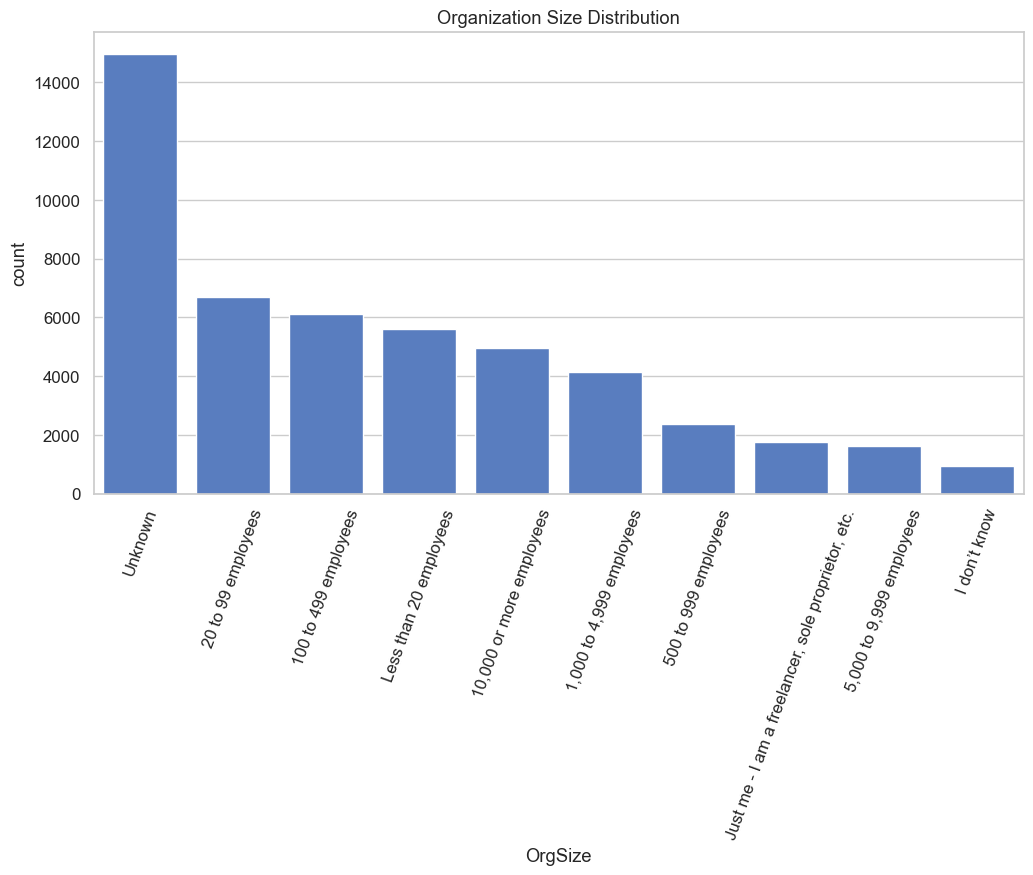

In [22]:
# Organization Size
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='OrgSize', order=df['OrgSize'].value_counts().index)
plt.title('Organization Size Distribution')
plt.xticks(rotation=70)
plt.show()
